In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [3]:
schema = {'target':int, 'id':int, 'date':str, 'flag':str, 'user':str, 'text':str}

df = pd.read_csv("./data/training.1600000.processed.noemoticon.csv", encoding="latin1", header=None, names=schema)

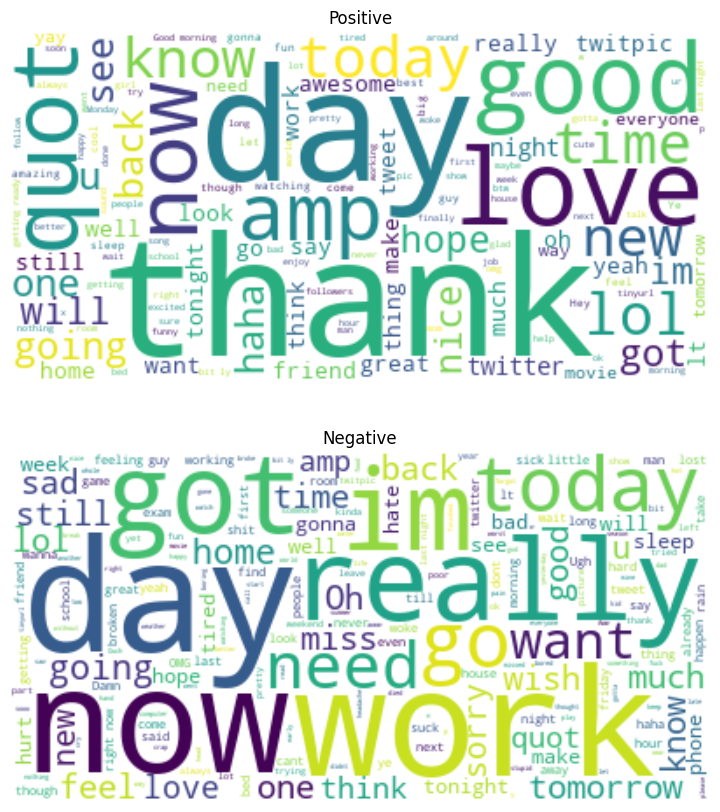

In [4]:
# Case 1: Without Preprocessing

sampled_positive = df[df['target'] == 4].sample(1000)
sampled_negative = df[df['target'] == 0].sample(1000)
text_positive = sampled_positive['text'].str.cat(sep=' ')
text_negative = sampled_negative['text'].str.cat(sep=' ')

wordcloud_positive = WordCloud(background_color='white', max_words=200).generate(text_positive)
wordcloud_negative = WordCloud(background_color='white', max_words=200).generate(text_negative)
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive')

plt.subplot(2, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative')
plt.show()


In [5]:
# Case 2: With Preprocessing
df['text_split'] = df['text'].str.split()
word_df = df.explode('text_split', ignore_index=True)

In [6]:
word_df['text_split'] = word_df['text_split'].str.lower()
groupby_text = word_df.groupby('text_split')['target'].value_counts().unstack(fill_value=0)
groupby_text.rename(columns={0:'negative', 4:'positive'}, inplace=True)
groupby_text = groupby_text.sort_values(by='positive', ascending=False)

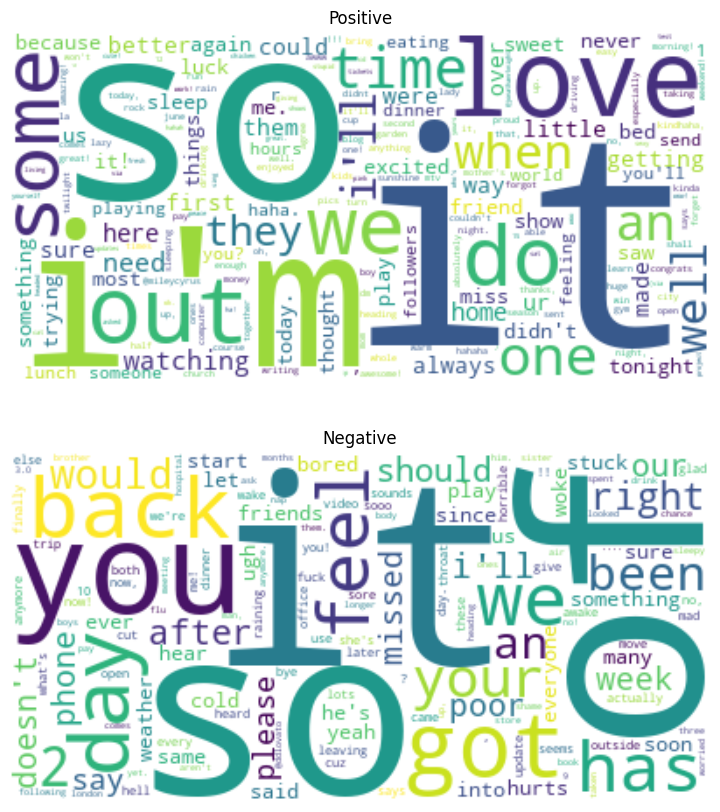

In [7]:
sampled_positive = groupby_text[groupby_text['positive'] > 100].positive.sample(n=1000)
sampled_negative = groupby_text[groupby_text['negative'] > 100].negative.sample(n=1000)

wordcloud_positive = WordCloud(background_color='white', max_words=200).generate_from_frequencies(sampled_positive)
wordcloud_negative = WordCloud(background_color='white', max_words=200).generate_from_frequencies(sampled_negative)

# show 2 wordclouds vertically
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive')

plt.subplot(2, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative')
plt.show()